# HİSTOGRAM

* Görüntü histogramı, dijital görüntüdeki ton dağılımının grafiksel bir temsili olarak işlev gören bir histogram türüdür. 
* Her bir ton değeri için piksel sayısını içerir.
* Belirli bir görüntü için histograma bakılarak , ton dağılımı anlaşılabilir.

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

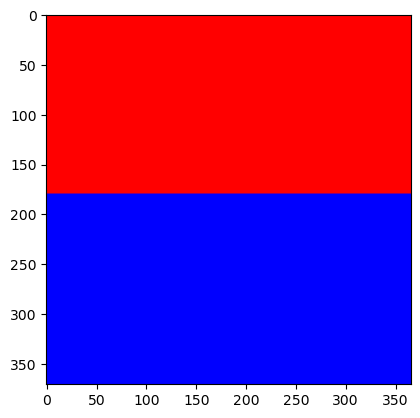

In [3]:
img= cv2.imread("red_blue.jpg")
img_vis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_vis)     
plt.show()

In [4]:
img_vis.shape

(371, 366, 3)

Öncesinde pure kırmızı ve mavi renklerden oluşan bir resim okuttuk ve bu resmin histogram grafiğini çizdirdik.

(256, 1)


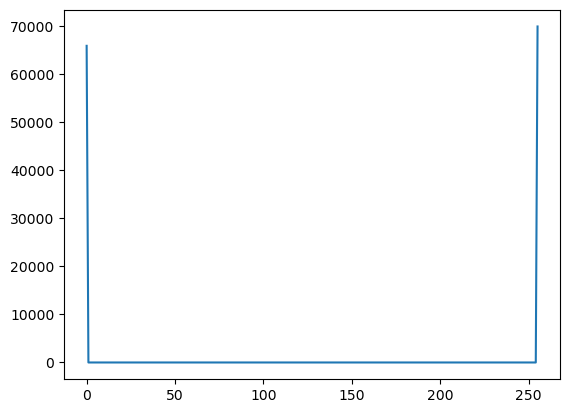

In [5]:
img_hist= cv2.calcHist([img],channels=[0], mask=None, histSize=[256],ranges=[0,256])
print(img_hist.shape)
plt.figure()
plt.plot(img_hist)


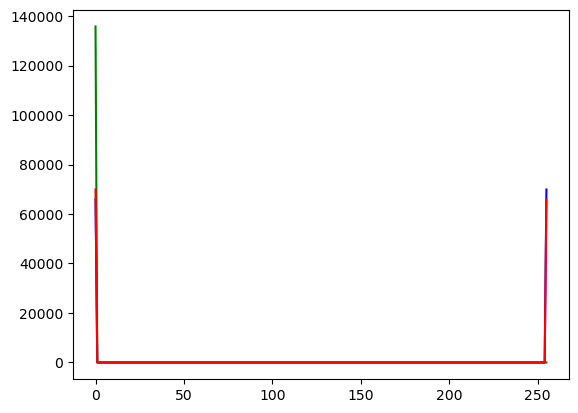

In [6]:

color= ("b","g","r")
plt.figure()
for i, c in enumerate(color):
    hist= cv2.calcHist([img],channels=[i], mask=None, histSize= [256], ranges=[0,256])
    plt.plot(hist, color= c)

Yukarıdaki grafiği incelersek yeşil renginin hiç olmamasından kaynaklı toplamda piksek sayısında 0 değerine karşılık geldiğini görebiliriz. Ardından kırmızı ve mavi renklerinin de toplam piksel sayısında yarı yarıya geldiğini görebiliriz.

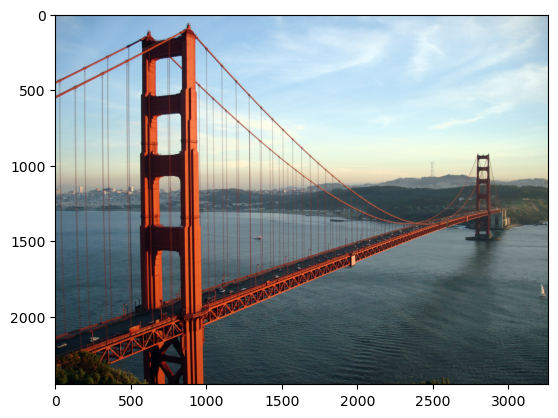

In [7]:
golden_gate = cv2.imread("goldenGate.jpg") 
golden_gate_vis = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(golden_gate_vis)    
    


Bu Golden Gate resminin çok büyük olmasından kaynaklı bir maskeleme işlemi uygulayacağız ve sadece belirli bir kısmı alacağız.

In [9]:
print(golden_gate.shape)


(2448, 3264, 3)


Önce resim ile aynı boyutta siyah bir resim yani maske elde ediyoruz.

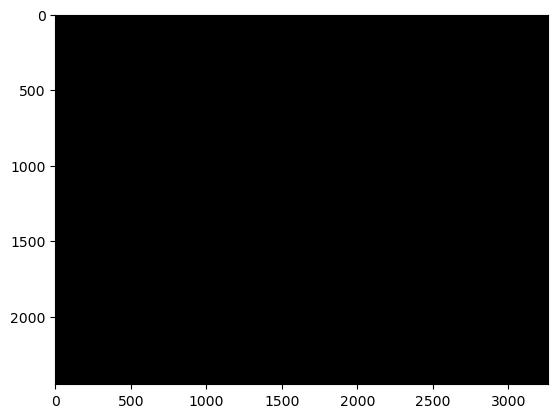

In [8]:

mask = np.zeros(golden_gate.shape[:2], np.uint8)
plt.figure()
plt.imshow(mask, cmap = "gray")



Ardından bu siyha resimde belirlenen koordinatları beyaza eştiliyoruz.

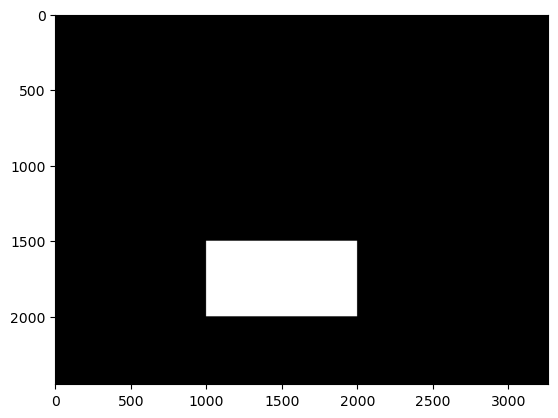

In [9]:
mask[1500:2000, 1000:2000] = 255
plt.figure()
plt.imshow(mask, cmap = "gray")



bitwise and operatörü ile bu iki resmi birleştirip ardından mask= mask diye eşitliyoruz.

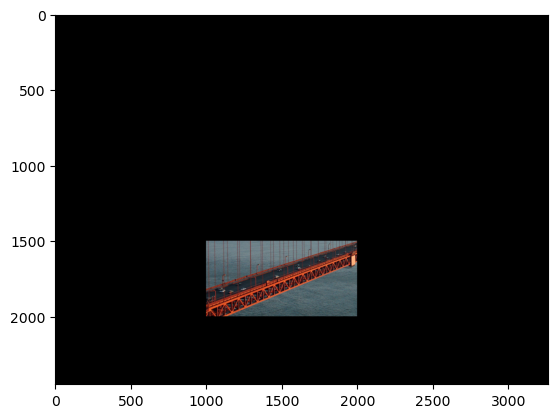

In [11]:
masked_img_vis = cv2.bitwise_and(golden_gate_vis, golden_gate_vis, mask = mask)
plt.figure()
plt.imshow(masked_img_vis, cmap = "gray")



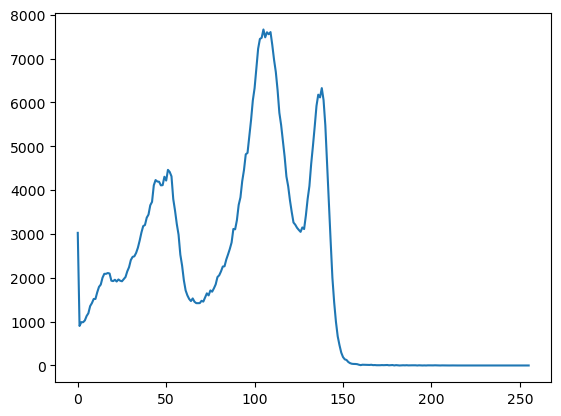

In [12]:
masked_img = cv2.bitwise_and(golden_gate, golden_gate, mask = mask)
masked_img_hist = cv2.calcHist([golden_gate], channels = [0], mask = mask, histSize = [256], ranges = [0,256]) # color channel order bgr bu nedenle channel sıfır yazıyoruz.
plt.figure()
plt.plot(masked_img_hist)


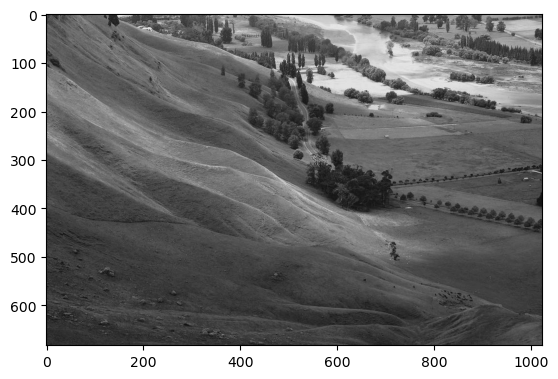

In [13]:
# histogram equalization :
# We will learn the concepts of histogram equalization and use it to improve the contrast of our images.
    
img = cv2.imread('hist_equ.jpg',0)
plt.figure()
plt.imshow(img, cmap = "gray")



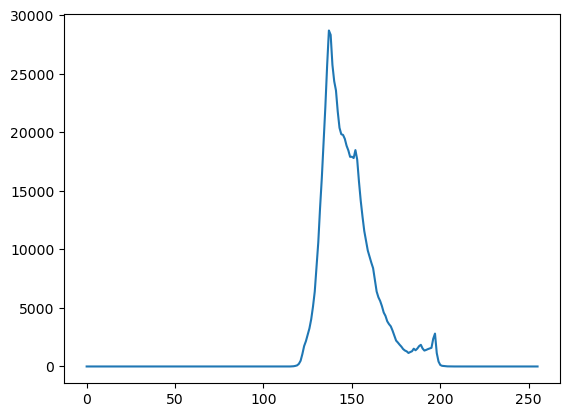

In [14]:
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])

plt.figure()
plt.plot(img_hist)



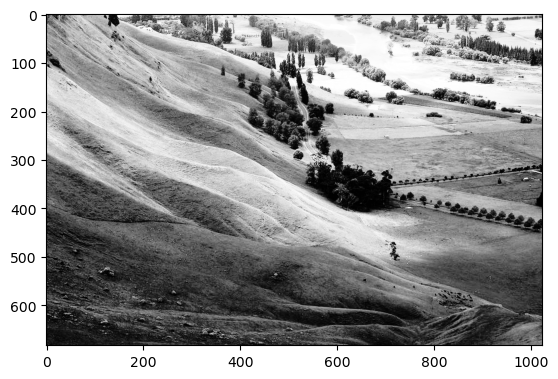

In [15]:
eq_img = cv2.equalizeHist(img)
plt.figure()
plt.imshow(eq_img, cmap = "gray")



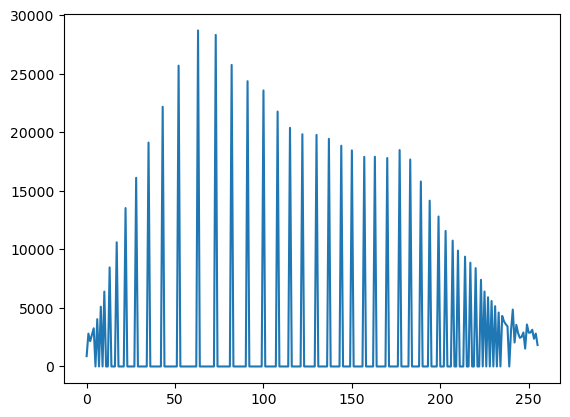

In [16]:
eq_img_hist = cv2.calcHist([eq_img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure()
plt.plot(eq_img_hist)